**When performing Exploratory Data Analysis (EDA) on a breast cancer dataset for binary classification, there are several key features and steps you should focus on:**

## Target Variable:
Diagnosis: This is your target variable, indicating whether the tumor is malignant or benign. Ensure you understand its distribution.
## Feature Importance:
Mean Features: These include radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, and fractal_dimension_mean.
Worst Features: These include radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, and fractal_dimension_worst.
Standard Error Features: These include radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, and fractal_dimension_se.
## Data Distribution:
Histograms: Plot histograms for each feature to understand their distributions.
Box Plots: Use box plots to identify outliers and understand the spread of the data.
## Correlation Analysis:
Heatmap: Create a heatmap to visualize correlations between features. Highly correlated features might be redundant.
Pair Plots: Use pair plots to visualize relationships between pairs of features and the target variable.
## Missing Values:
Check for Missing Values: Ensure there are no missing values in your dataset. If there are, decide on an appropriate strategy to handle them (e.g., imputation).
## Feature Engineering:
Feature Scaling: Consider scaling features, especially if you plan to use algorithms sensitive to feature scales (e.g., SVM, KNN).
Dimensionality Reduction: Techniques like PCA can help reduce the number of features while retaining most of the variance.
## Class Imbalance:
Check for Class Imbalance: Ensure that the classes (malignant and benign) are balanced. If not, consider techniques like SMOTE to balance the classes.

## Problem Identification
The target variables is the *Diagnosis Features* which is a binary classification
column indicates whether the tumor is:
   > 1. malignant (M) - A malignant tumor is a cancerous tumor that grows out of control and spreads to other parts of the body or
   > 2. benign (B)- A growth that is not cancer. It does not invade nearby tissue or spread to other parts of the body. 
   
This is the feature you will use for binary classification, this is stating that one is cancerous and the other isn't. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("breast cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.shape


(569, 33)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Let me find how many of each class if there is class imbalance
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
m = df.diagnosis == "M"
m.value_counts()

# This is stating that, there 212 malignent tumor and 357 benign

False    357
True     212
Name: diagnosis, dtype: int64

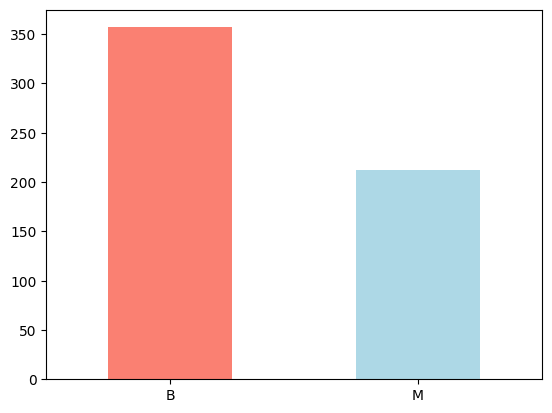

In [7]:
# The percentage difference between the two class is 50.97% which is a good percentage 
df.diagnosis.value_counts().plot(kind='bar', color = ['salmon', 'lightblue'])
plt.xticks(rotation=0);

In [8]:
# let's check if there is a missing data 
df.isna().sum() # notice a variable is totally null

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
newdf = df.drop("Unnamed: 32", axis = 1)
newdf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
newdf.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

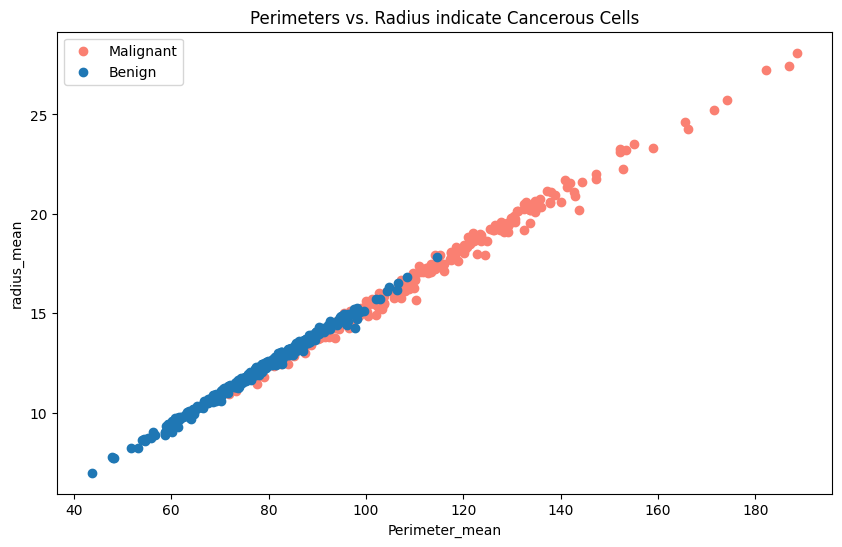

In [12]:
plt.figure(figsize=(10,6))

# create the plot for those with cancerous and non cancerous tumor
plt.scatter(newdf['perimeter_mean'][newdf['diagnosis'] =='M'],
           newdf['radius_mean'][newdf['diagnosis']== 'M'],
           c= 'salmon')

# Create the plot for those tumor that is not cancerous 
plt.scatter(newdf['perimeter_mean'][newdf['diagnosis'] =='B'],
           newdf['radius_mean'][newdf['diagnosis']== 'B'])

plt.title("Perimeters vs. Radius indicate Cancerous Cells")
plt.xlabel('Perimeter_mean')
plt.ylabel('radius_mean')
plt.legend(['Malignant', 'Benign']);

In [13]:
import pandas as pd

# Created a new features to categorize the bins into 3 
newdf['radius_mean_bin'] = pd.cut(newdf['radius_mean'], bins=[0, 10, 20, 30], labels=['small', 'medium', 'large'])
crosstab = pd.crosstab(newdf['radius_mean_bin'],  newdf['diagnosis'])
print(crosstab) # of a certain the larger is cancerous cell 


diagnosis          B    M
radius_mean_bin          
small             47    0
medium           310  167
large              0   45


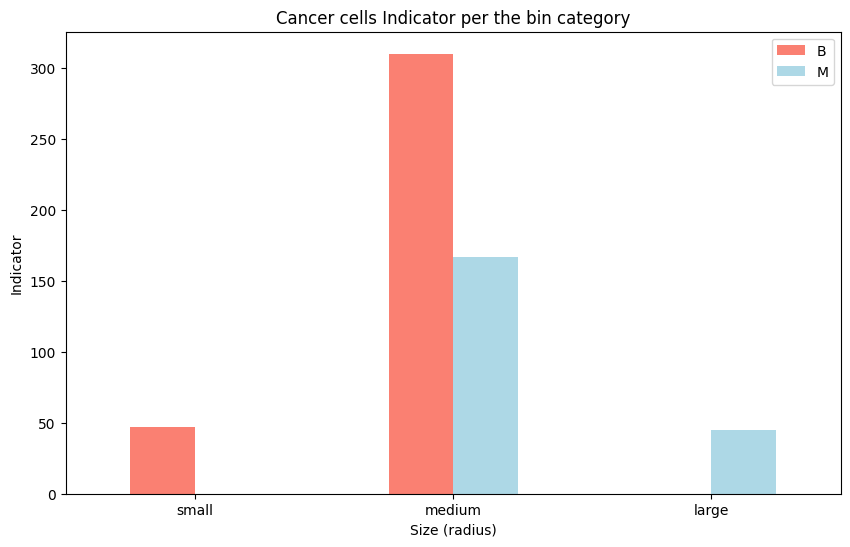

In [14]:
# Make the crosstab more visual 
pd.crosstab(newdf.radius_mean_bin, newdf.diagnosis).plot(kind= "bar",
                                                        figsize=(10,6),
                                                        color=['salmon', 'lightblue'])

# Add some communication 
plt.title("Cancer cells Indicator per the bin category")
plt.xlabel("Size (radius)")
plt.ylabel("Indicator")
plt.legend(['B', 'M'])
plt.xticks(rotation=0);

This clearly shows what causes breast cancer and what doesn't look treatening by size 

C:\Users\lucyk\AppData\Local\Temp\ipykernel_7032\1240494553.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_max = newdf.corr()


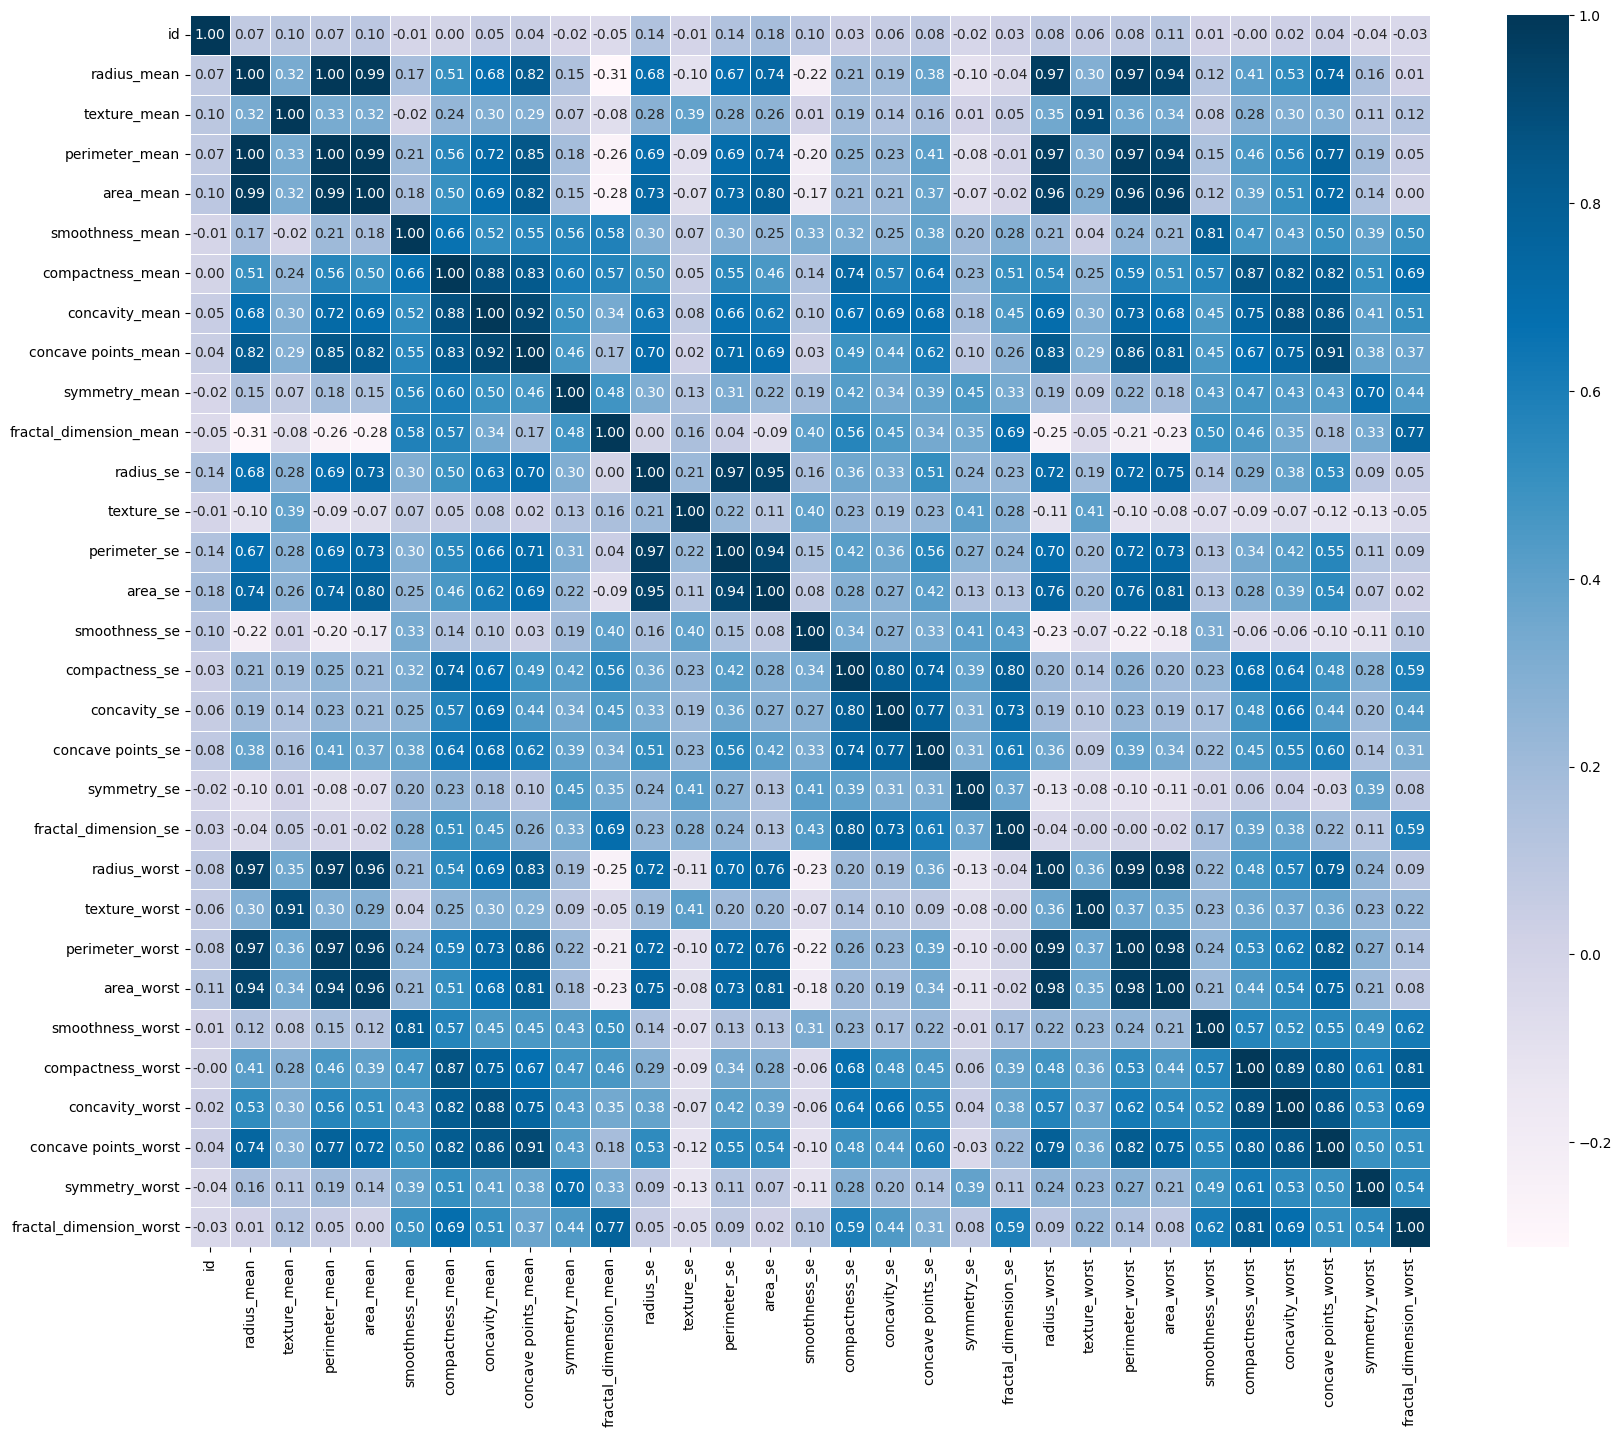

In [15]:
import seaborn as sns 

# let's view the correlation matrix and have clear view on the high positive correlation and negative correlations
corr_max = newdf.corr()
fig, ax = plt.subplots(figsize = (20, 16))

ax = sns.heatmap(corr_max, annot = True, linewidths= 0.5, fmt = '.2f', cmap = "PuBu")
ax.set_xticklabels(corr_max, rotation = 90);

### Feature engineering 

In [16]:
# Turn content into categorical and fill missing value 
for label, content in newdf.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn the categorical value into number and add +1
        newdf[label]= pd.Categorical(content).codes+1

In [17]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int8   
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
newdf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_mean_bin
0,842302,2,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,842517,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,3
2,84300903,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,84348301,2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,84358402,2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3


## Modelling 

In [19]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [20]:
# Split the data into X and y
X = newdf.drop('diagnosis', axis = 1)
y = newdf.diagnosis

In [21]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_mean_bin
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,2
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,3
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,2
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,2
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,3
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,3
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,2
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,3


In [22]:
y

0      2
1      2
2      2
3      2
4      2
      ..
564    2
565    2
566    2
567    2
568    1
Name: diagnosis, Length: 569, dtype: int8

In [23]:
# split the data into train and test
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.7543859649122807,
 'Logistic Regression': 0.6228070175438597,
 'Random Forest': 0.956140350877193}

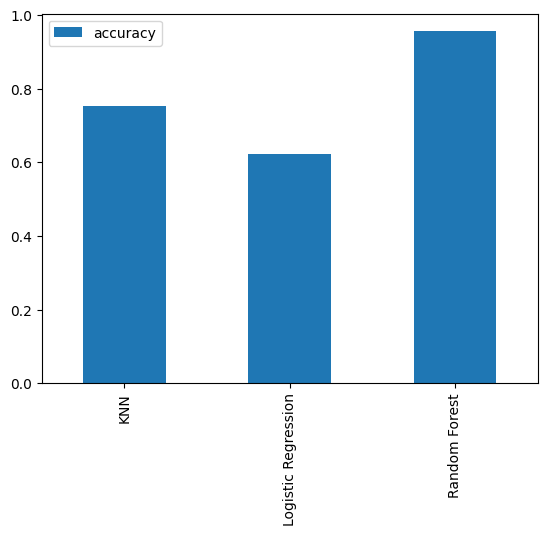

In [25]:
## Model comparison 
compar_df= pd.DataFrame(model_scores, index= ['accuracy'])
compar_df.T.plot.bar();

In [26]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 31) # 1 to 20

# Create a list of different number of leaf_size
# leaf_size = iter(int(list(range(1,51))))

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i, leaf_size=50 ) # set neighbors value
    
    np.random.seed(42)
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [27]:
# let's look at the KNN train scores

In [28]:
train_scores

[1.0,
 0.8901098901098901,
 0.9098901098901099,
 0.8263736263736263,
 0.8417582417582418,
 0.7934065934065934,
 0.7956043956043956,
 0.7626373626373626,
 0.7648351648351648,
 0.7472527472527473,
 0.7472527472527473,
 0.7384615384615385,
 0.7362637362637363,
 0.7230769230769231,
 0.7252747252747253,
 0.7296703296703296,
 0.7274725274725274,
 0.7120879120879121,
 0.7120879120879121,
 0.7076923076923077,
 0.7076923076923077,
 0.7076923076923077,
 0.7054945054945055,
 0.7098901098901099,
 0.7098901098901099,
 0.7054945054945055,
 0.7120879120879121,
 0.7076923076923077,
 0.7054945054945055,
 0.7076923076923077]

In [29]:
test_scores

[0.7807017543859649,
 0.7894736842105263,
 0.7631578947368421,
 0.7368421052631579,
 0.7543859649122807,
 0.7280701754385965,
 0.7280701754385965,
 0.7192982456140351,
 0.7192982456140351,
 0.7280701754385965,
 0.7280701754385965,
 0.7192982456140351,
 0.7105263157894737,
 0.7105263157894737,
 0.6929824561403509,
 0.6754385964912281,
 0.6842105263157895,
 0.7017543859649122,
 0.6842105263157895,
 0.7017543859649122,
 0.7017543859649122,
 0.6842105263157895,
 0.7105263157894737,
 0.6842105263157895,
 0.6929824561403509,
 0.6929824561403509,
 0.6929824561403509,
 0.6929824561403509,
 0.6842105263157895,
 0.6929824561403509]

The maxmium KNN algorithm score:  78.95%


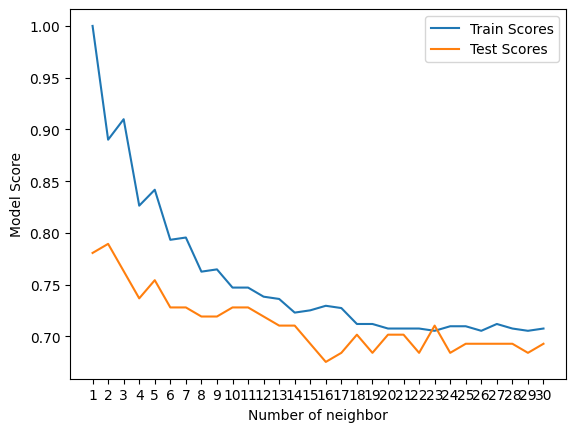

In [30]:
plt.plot(neighbors, train_scores, label= 'Train Scores')
plt.plot(neighbors, test_scores, label= 'Test Scores')

plt.xticks(np.arange(1,31,1))
plt.xlabel('Number of neighbor')
plt.ylabel('Model Score')
plt.legend()

print(f'The maxmium KNN algorithm score: {max(test_scores) * 100: .2f}%');

In [31]:
# perfect not overfitting

# let check for logisticregression

In [35]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-5, 5, 30),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1200, 40),
           "max_depth": [None, 3, 5, 10, 20],
           "min_samples_split": np.arange(2, 30, 2),
           "min_samples_leaf": np.arange(1, 30, 2)}

In [32]:
# # Find the best params
# rs_rf.best_params_

In [33]:
# # evaluate the model
# rs_rf.score(X_test, y_test)

In [36]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=30,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [37]:
# find the best params
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': None}

In [39]:
# Instantiate the best model with best hyperparameters
clf = RandomForestClassifier(n_estimators=120,
                            min_samples_split = 2,
                            min_samples_leaf = 9,
                            max_depth = None)

In [41]:
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=9, n_estimators=120)

In [42]:
# evaluate the model
clf.score(X_test, y_test)

0.9649122807017544

## Evaluation


In [43]:
# make predictions on the test data
y_preds = clf.predict(X_test)

In [44]:
y_preds

array([1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2], dtype=int8)

In [45]:
np.array(y_test)

array([1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2], dtype=int8)

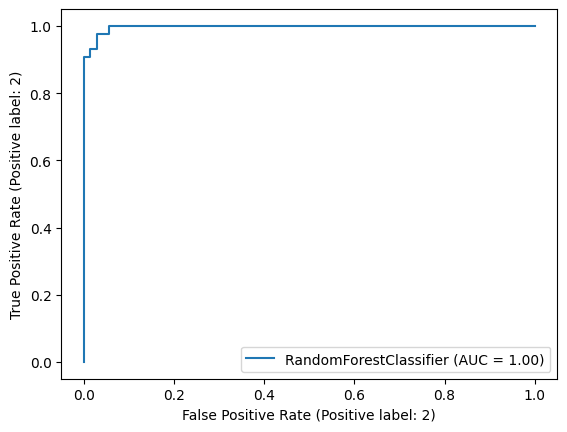

In [46]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(clf, X_test, y_test);

In [47]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97        71
           2       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



We have a very good model with the random forest classifier because we realize a very high f1-score which is average of 96%.

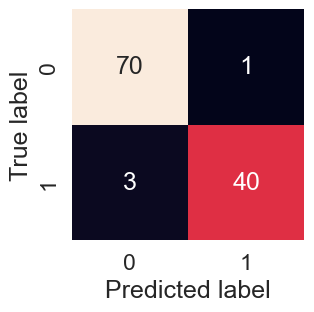

In [48]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

## Feature Importance For Random Forest

In [52]:
# Check feature importances
clf.feature_importances_


array([0.002492  , 0.0176454 , 0.01073088, 0.05892222, 0.05554113,
       0.00261744, 0.01029478, 0.0502082 , 0.10925699, 0.00041293,
       0.00201117, 0.01054035, 0.00099343, 0.01452225, 0.0616664 ,
       0.00122319, 0.00276092, 0.00122693, 0.0009284 , 0.00253073,
       0.00063865, 0.10392546, 0.0159517 , 0.1552351 , 0.05833818,
       0.00666195, 0.021503  , 0.06112706, 0.14863264, 0.00693035,
       0.00289374, 0.00163643])

In [54]:
# Match features to columns
features_dict = dict(zip(newdf.columns, clf.feature_importances_))
features_dict


{'id': 0.0024920020065491446,
 'diagnosis': 0.017645395658584685,
 'radius_mean': 0.010730875766825668,
 'texture_mean': 0.05892221707007081,
 'perimeter_mean': 0.05554113452694742,
 'area_mean': 0.0026174369907749633,
 'smoothness_mean': 0.0102947796621085,
 'compactness_mean': 0.0502081990562055,
 'concavity_mean': 0.10925698996945751,
 'concave points_mean': 0.00041292518819519393,
 'symmetry_mean': 0.00201117131138117,
 'fractal_dimension_mean': 0.010540349773632725,
 'radius_se': 0.00099343066280119,
 'texture_se': 0.01452225381754849,
 'perimeter_se': 0.061666400731981465,
 'area_se': 0.0012231878789846658,
 'smoothness_se': 0.002760919498266289,
 'compactness_se': 0.001226934289525156,
 'concavity_se': 0.0009283986511398733,
 'concave points_se': 0.0025307251560976107,
 'symmetry_se': 0.0006386535013563466,
 'fractal_dimension_se': 0.10392546101412031,
 'radius_worst': 0.01595170015204154,
 'texture_worst': 0.15523510002653093,
 'perimeter_worst': 0.058338178510441395,
 'area_wo

Now we've match the feature coefficients to different features, let's visualize them.

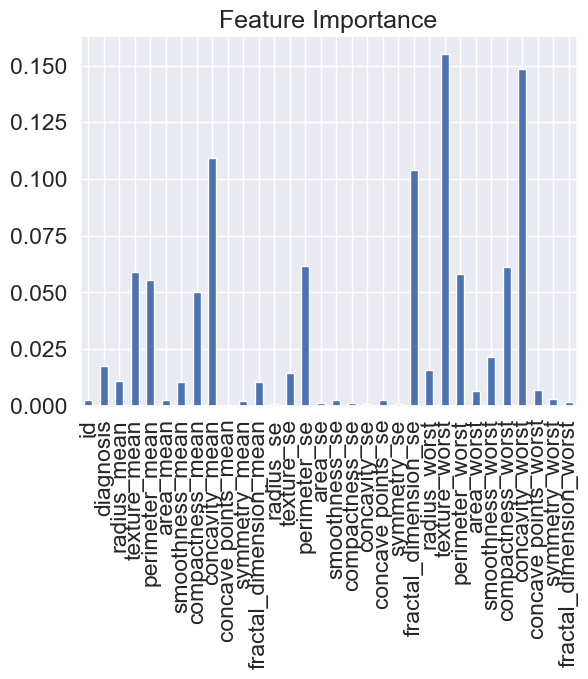

In [55]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

or plot in an descending order to get a better and cleaner insight.

In [64]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    dff = (pd.DataFrame({'features': columns,
                       'feature_importances': importances})
         .sort_values('feature_importances', ascending= False)
         .reset_index(drop=True))
    # plot the dataframe
    fig, ax= plt.subplots()
    ax.barh(dff['features'][:n], dff['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis();


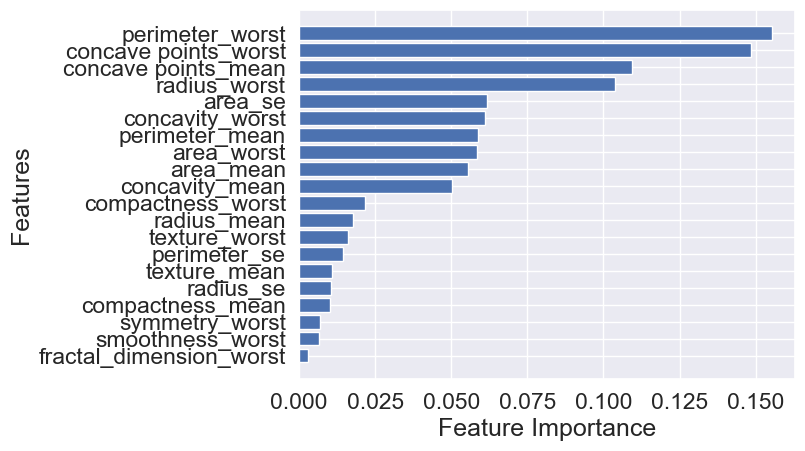

In [65]:
plot_features(X_train.columns, clf.feature_importances_);

This graph shows that the feature created wasn't important for machine learning but played a key role to generate insight from the exploratory data analysis.